<h1 style="text-align: center;">Hello! Welcome to my notebook💗💗💗

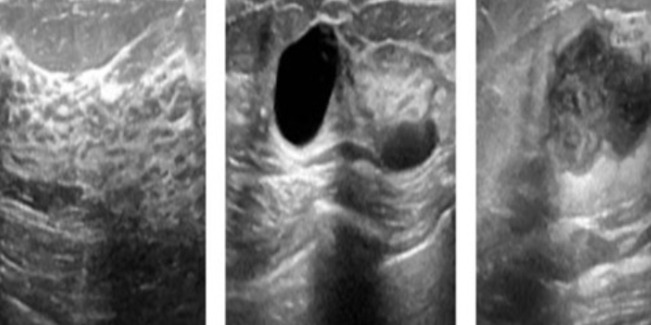

# 📌Importing all needed Librarires

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
import seaborn as sns
tf.random.set_seed(3)

<h6>🔴Data about Breast Ultrasound Images Dataset 
<h6> 🔴and contains 3 files (Classes) [benign,malignant,normal]


# 📌 Display 2 images from each class

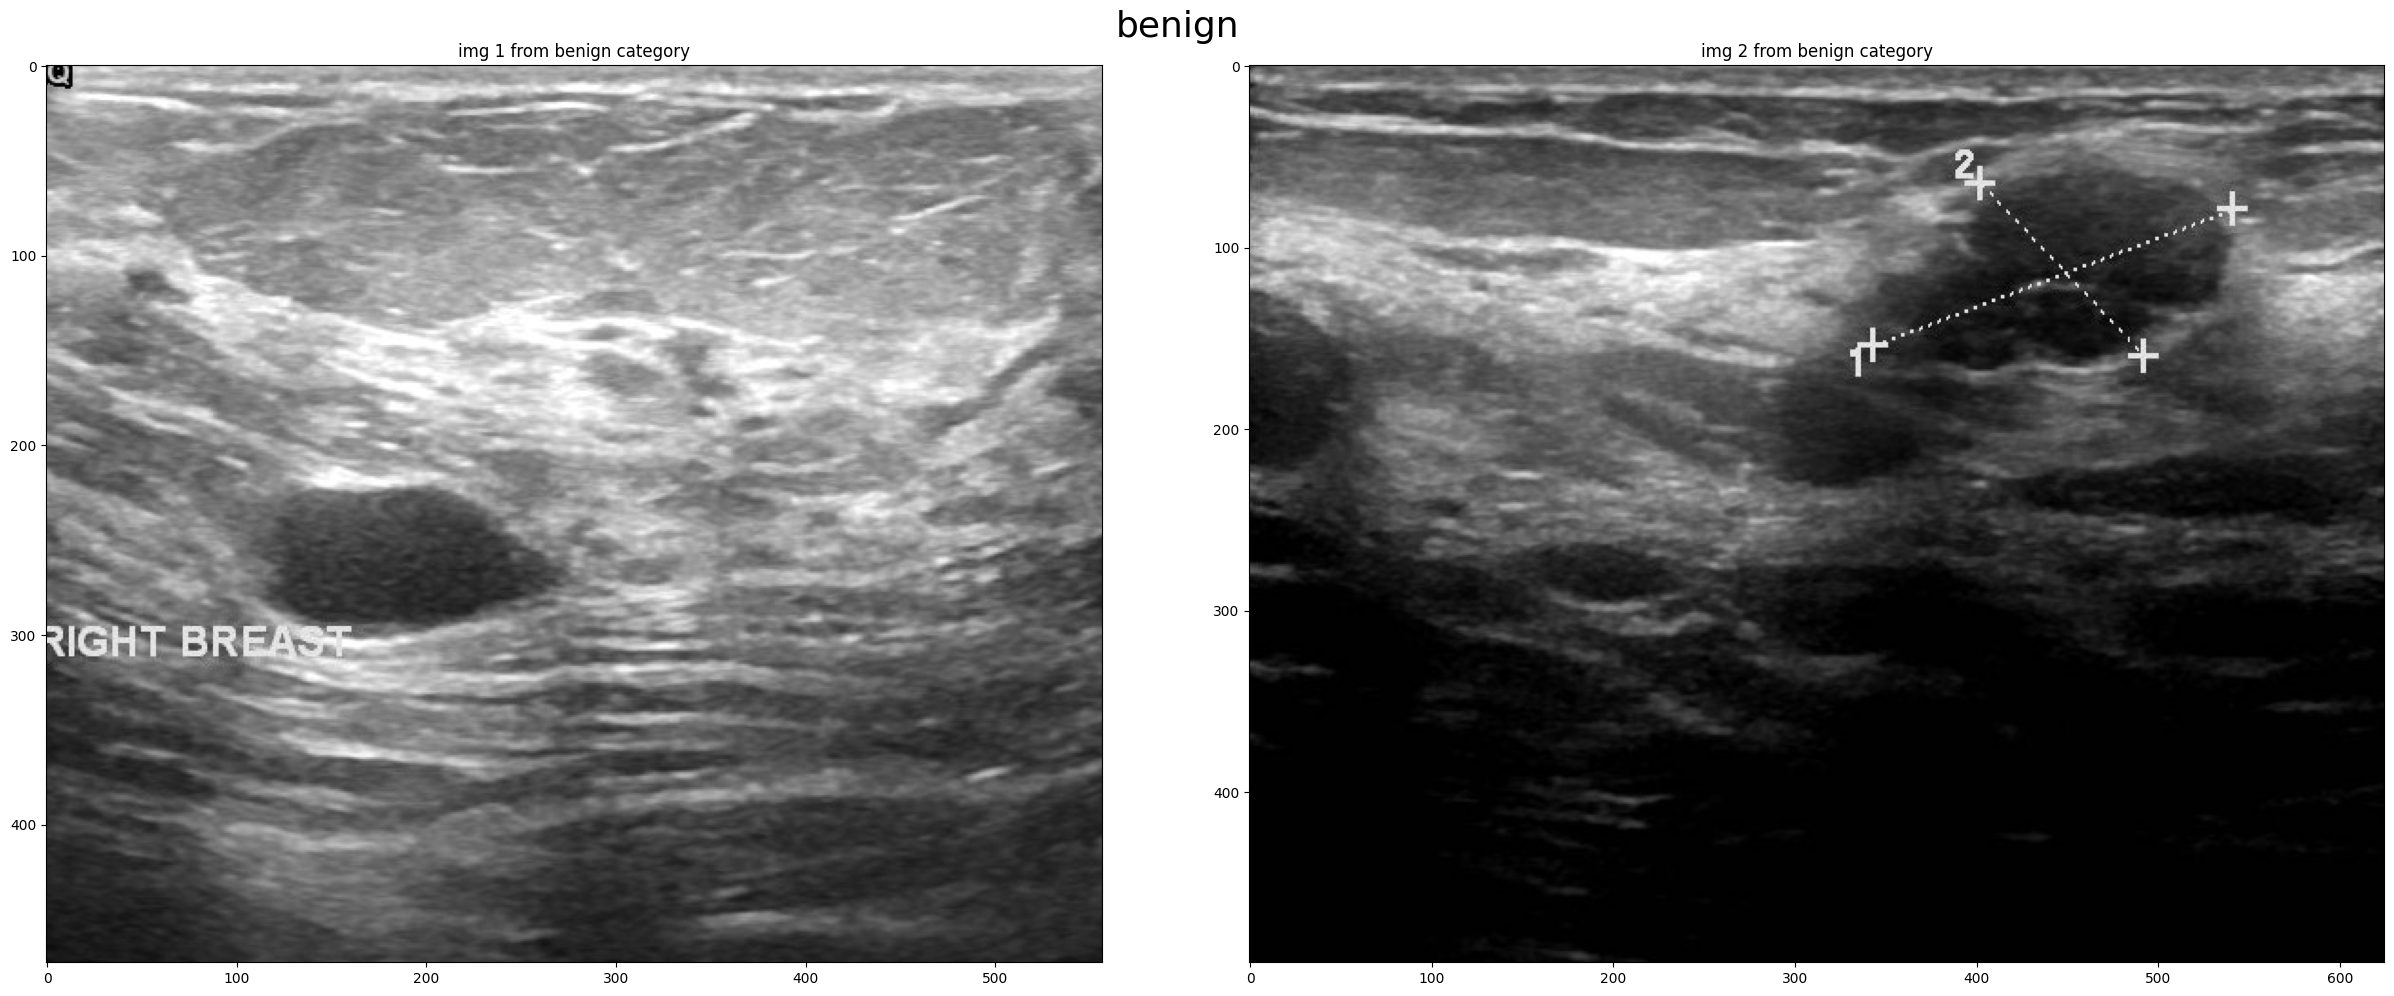

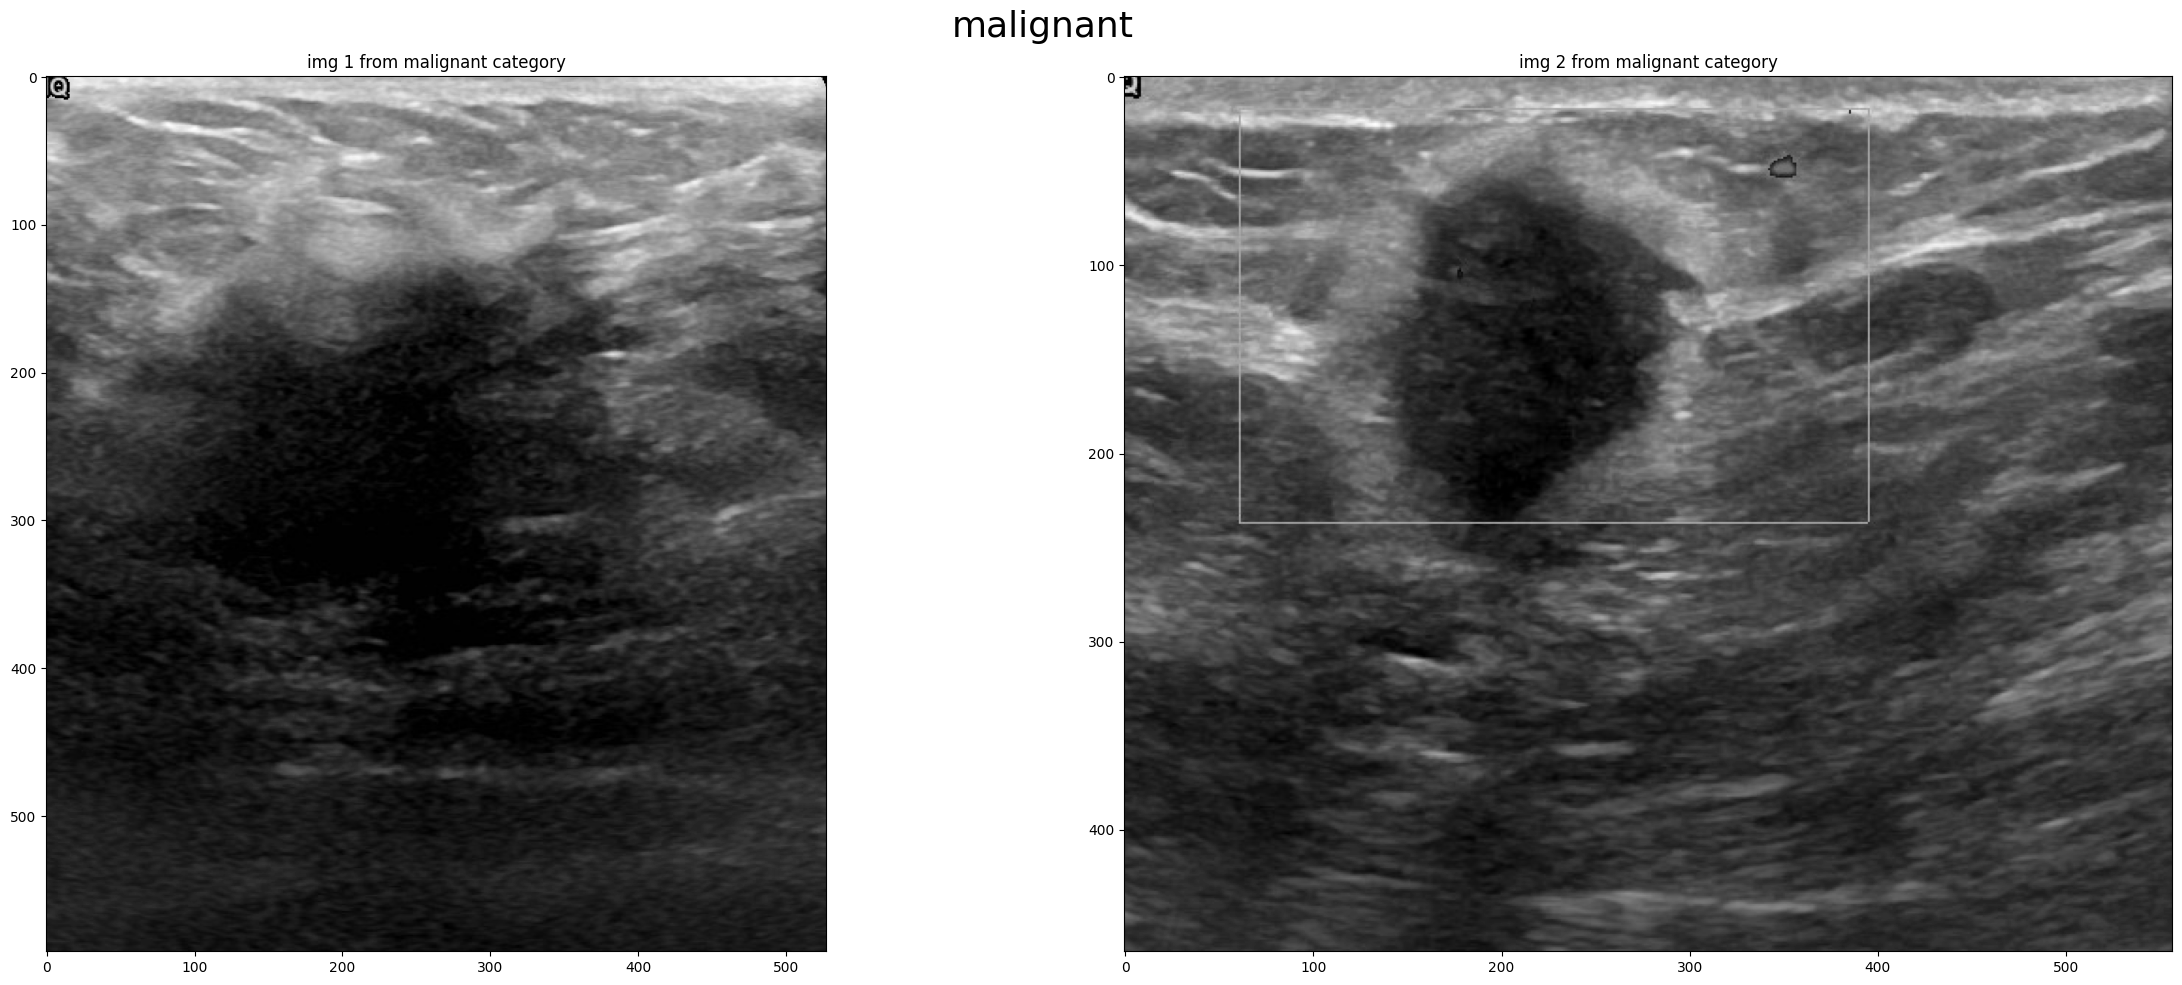

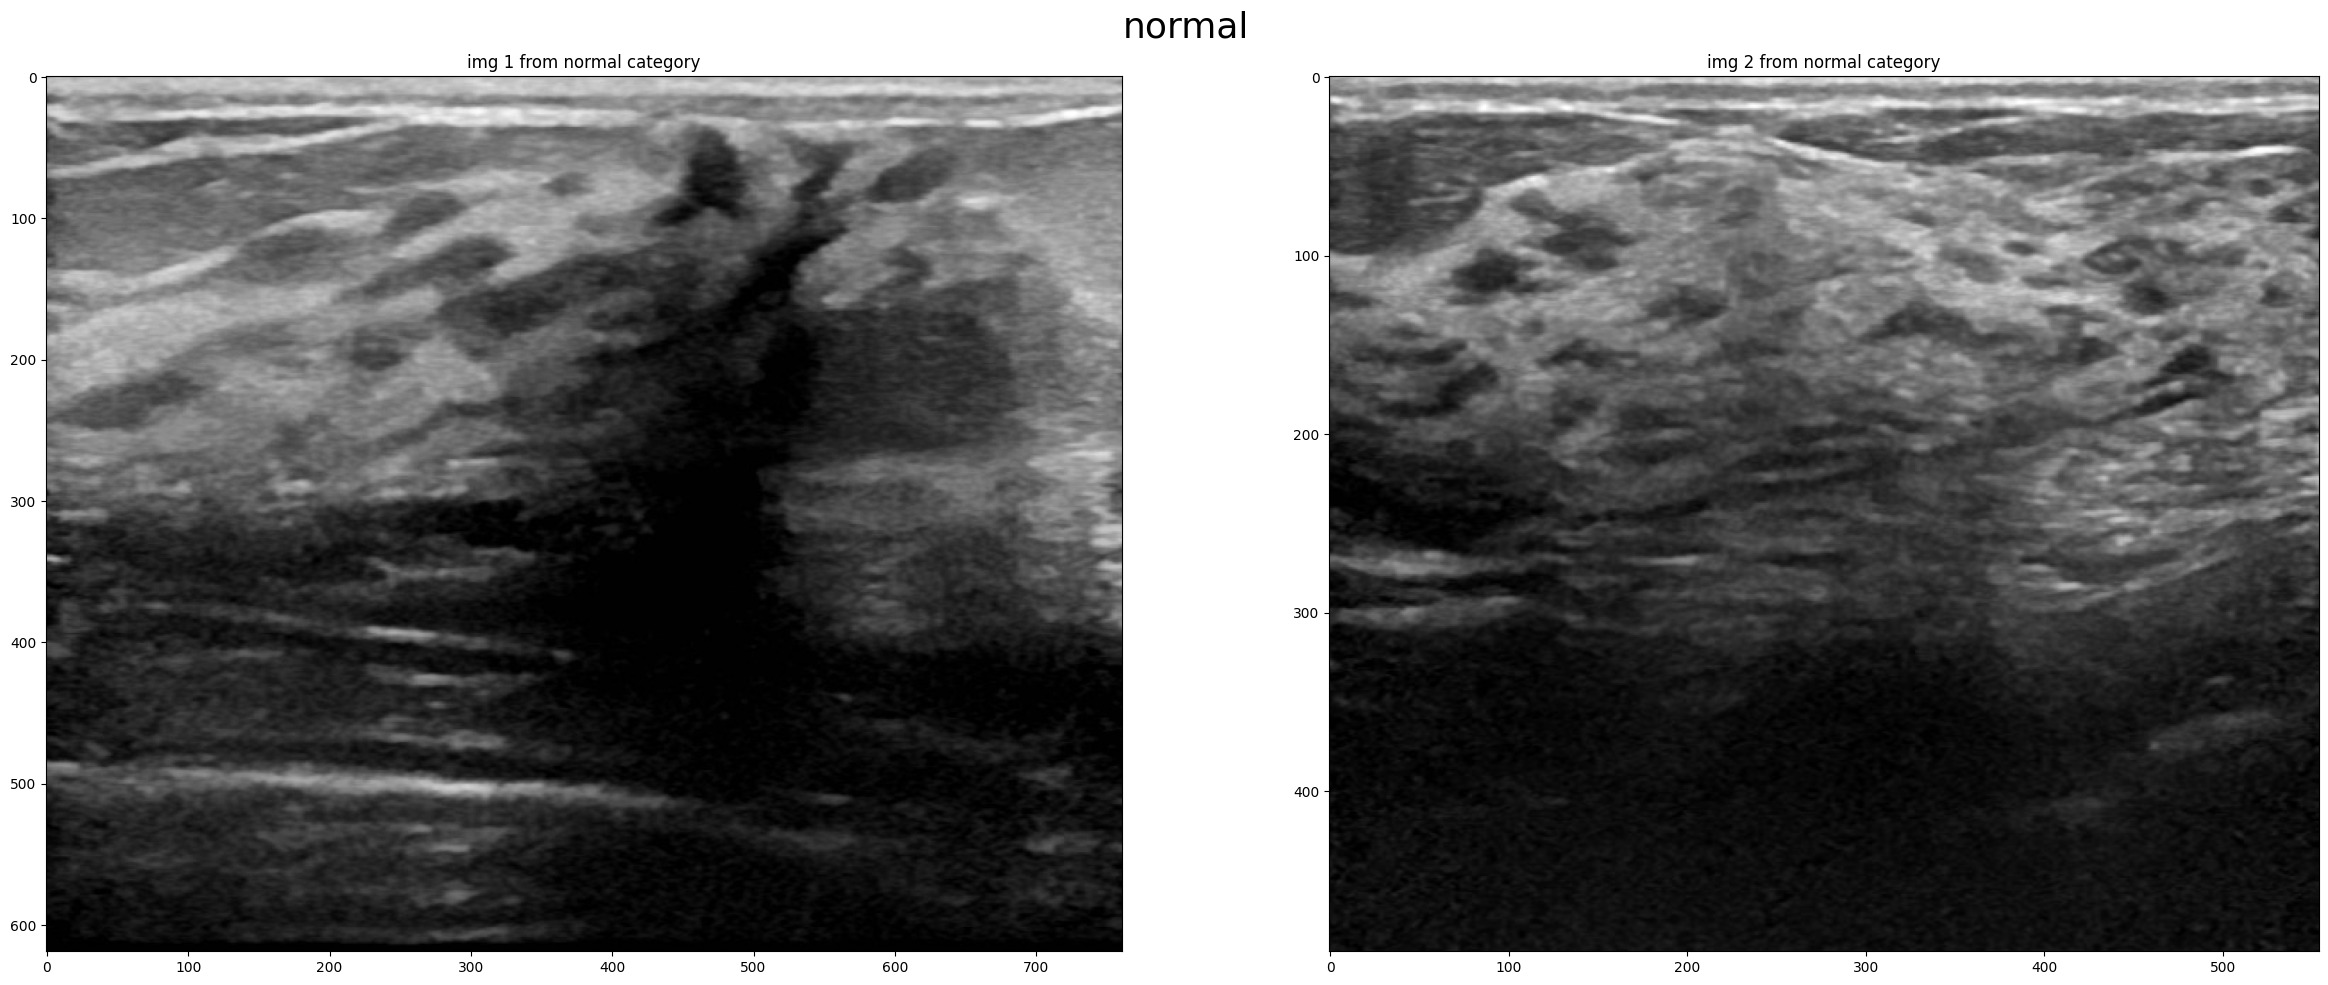

In [3]:
folder_name = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'
files_names = ['benign', 'malignant', 'normal']

for file in files_names:
    path = os.path.join(folder_name, file)
    x = 0
    fig, axes = plt.subplots(1,2, figsize=(25, 10))  
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        axes[x].imshow(img_array, cmap='gray')
        axes[x].set_title(f"img {x+1} from {file} category")
        x += 1
        if x == 2: 
            break

    plt.suptitle(file, fontsize=26)
    plt.tight_layout()
    plt.show()


<h6> 🔴we notice that images with different sizes

# 📌choose the best size for the images

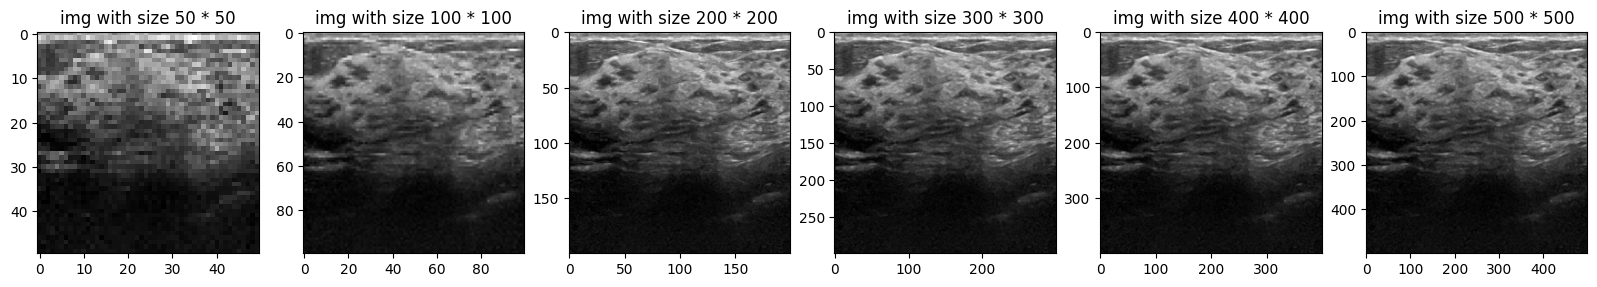

In [4]:
img_sz = [50, 100, 200, 300, 400, 500]
plt.figure(figsize=(20, 5))

for i, sz in enumerate(img_sz):
    new_array = cv2.resize(img_array, (sz, sz))
    plt.subplot(1, len(img_sz), i+1)
    plt.imshow(new_array, cmap='gray')
    plt.title(f"img with size {sz} * {sz}")

plt.show()


In [5]:
#size (300*300) is okay
img_sz=300

# 📌Loading Data

In [6]:
training_data = []

def create_training_data():
    for file in files_names:
        path = os.path.join(folder_name, file)
        class_num = files_names.index(file)
        print(file,class_num)
        
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_sz, img_sz))  # Include resizing
            training_data.append([new_array, class_num])

create_training_data()


benign 0


100%|██████████| 891/891 [00:10<00:00, 82.35it/s] 


malignant 1


100%|██████████| 421/421 [00:05<00:00, 80.89it/s]


normal 2


100%|██████████| 266/266 [00:03<00:00, 70.89it/s]


### 📍📍Display classes for the first 5 images

In [7]:
for i in range(5):
    print("Class number for image", i+1, ":", training_data[i][1])

Class number for image 1 : 0
Class number for image 2 : 0
Class number for image 3 : 0
Class number for image 4 : 0
Class number for image 5 : 0


<h3>📍📍Display classes for the last 5 images

In [8]:
for i in range(-1, -6, -1):
    print("Class number for image", len(training_data) + i + 1, ":", training_data[i][1])


Class number for image 1578 : 2
Class number for image 1577 : 2
Class number for image 1576 : 2
Class number for image 1575 : 2
Class number for image 1574 : 2


<h6> 🔴Now Data has benign images then malignant then normal

# 📌 Shuffling the Data

<h3>📍📍Suffling and display the first 20 classes after suffling

In [10]:
random.shuffle(training_data)

for i in range(30):
    print(f"Sample {i+1}:")
    print("Class number:", training_data[i][1],"\n") 

Sample 1:
Class number: 0 

Sample 2:
Class number: 0 

Sample 3:
Class number: 0 

Sample 4:
Class number: 0 

Sample 5:
Class number: 0 

Sample 6:
Class number: 0 

Sample 7:
Class number: 1 

Sample 8:
Class number: 1 

Sample 9:
Class number: 1 

Sample 10:
Class number: 1 

Sample 11:
Class number: 1 

Sample 12:
Class number: 0 

Sample 13:
Class number: 0 

Sample 14:
Class number: 2 

Sample 15:
Class number: 0 

Sample 16:
Class number: 2 

Sample 17:
Class number: 2 

Sample 18:
Class number: 0 

Sample 19:
Class number: 0 

Sample 20:
Class number: 0 

Sample 21:
Class number: 0 

Sample 22:
Class number: 1 

Sample 23:
Class number: 2 

Sample 24:
Class number: 2 

Sample 25:
Class number: 0 

Sample 26:
Class number: 0 

Sample 27:
Class number: 0 

Sample 28:
Class number: 1 

Sample 29:
Class number: 0 

Sample 30:
Class number: 0 



# 📌Feature Selection

In [21]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)


X=np.array(X)
y=np.array(y)

<h3>📍📍Convert from list to numpy array

In [87]:
X=np.array(X)
y=np.array(y)
print(X.shape)
print(y.shape)

(1578, 300, 300)
(1578,)


<h6> 🔴(300,300) is the shape of images in X 

# 📌Spliting the Data 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1262, 300, 300)
(1262,)
(316, 300, 300)
(316,)


<h3>📍📍 Unique values in y (Classes)

In [24]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2]
[0 1 2]


# 📌Scaling the values of X (images' Values)

In [25]:
X_train = X_train/255
X_test = X_test/255

<h6>🔴Scaling the values to the range [0, 1] 

<h3>📍📍printing and display the first image after Scalling

In [33]:
print(X_train[0])

[[0.68235294 0.38039216 0.03921569 ... 0.63529412 0.63137255 0.59215686]
 [0.78039216 0.20392157 0.02352941 ... 0.61176471 0.60392157 0.59215686]
 [0.77647059 0.21176471 0.01176471 ... 0.58431373 0.59215686 0.58823529]
 ...
 [0.11764706 0.11372549 0.11372549 ... 0.09019608 0.09019608 0.09803922]
 [0.12156863 0.12156863 0.11764706 ... 0.0627451  0.08235294 0.09411765]
 [0.12156863 0.11764706 0.11764706 ... 0.0745098  0.08627451 0.09411765]]


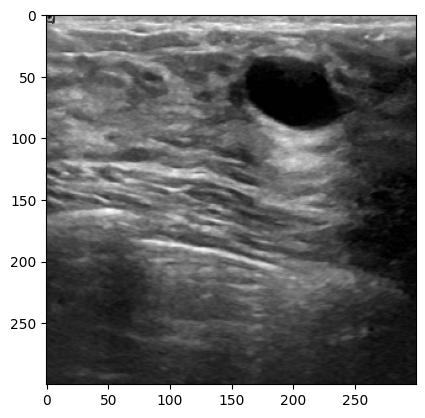

In [34]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

# 📌Building the Neural Network (NN)

In [76]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(img_sz,img_sz)),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(64, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(16, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(3, activation='sigmoid')
])

# 📌Compiling the Neural Network

In [77]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 📌Training the Neural Network

In [78]:
history=model.fit(X_train, y_train, epochs=10,validation_split=0.1)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 145ms/step - accuracy: 0.4325 - loss: 1.6915 - val_accuracy: 0.5748 - val_loss: 1.1843
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.5707 - loss: 0.9726 - val_accuracy: 0.6457 - val_loss: 0.9798
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.6835 - loss: 0.9399 - val_accuracy: 0.6929 - val_loss: 0.9932
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.7297 - loss: 0.7608 - val_accuracy: 0.7008 - val_loss: 0.8193
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.7549 - loss: 0.6828 - val_accuracy: 0.7165 - val_loss: 0.8184
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.7602 - loss: 0.6533 - val_accuracy: 0.6457 - val_loss: 0.8030
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.7734 - loss: 0.6162 - val_accuracy: 0.6378 - val_loss: 0.9321
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.7774 - loss: 0.5908 - val_accuracy: 0

<h3>📍📍 Model Summary

In [79]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 90000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 256)            │    23,040,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,252,539 (264.18 MB)

 Trainable params: 23,084,179 (88.06 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 46,168,360 (176.12 MB)

# 📌Evaluation the Model

In [85]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuarcy of the model is : {accuracy*100:.2f} %")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6996 - loss: 0.7537
Accuarcy of the model is : 72.47 %


<h3>📍📍Y prediction 

In [84]:
y_pred=model.predict(X_test)
print(y_pred[0])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0.9999859 0.9999685 0.9996299]



 <h6> 🔴[first val is probability of class 0 "benign",second val is probability of class 1 "malignant",third val  is probability of class 2"normal"]


<h3>📍📍converting the prediction probabilities to class label

In [46]:
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0]


<h3>📍📍y_test vs y_pred

In [53]:
comparison_df = pd.DataFrame({ 'Actual': y_test,'Predicted': y_pred})

print(comparison_df[:20])

    Actual  Predicted
0        0          0
1        0          0
2        0          0
3        2          0
4        0          0
5        0          0
6        0          0
7        0          0
8        1          1
9        0          0
10       0          0
11       2          0
12       1          1
13       0          0
14       1          0
15       1          1
16       0          0
17       1          1
18       0          0
19       0          0


<h3>📍📍Confusion Matrix

In [47]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

tf.Tensor(
[[169  16   0]
 [ 42  38   0]
 [ 25   0  26]], shape=(3, 3), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

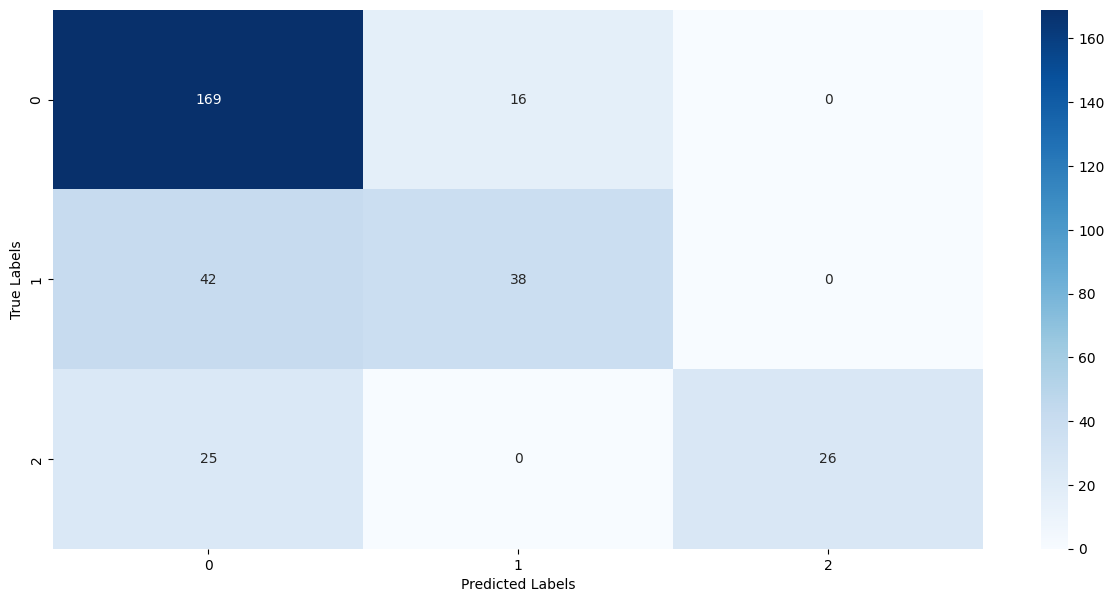

In [86]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

<h3>📍📍Classification Report

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.72      0.91      0.80       185
           1       0.70      0.47      0.57        80
           2       1.00      0.51      0.68        51

    accuracy                           0.74       316
   macro avg       0.81      0.63      0.68       316
weighted avg       0.76      0.74      0.72       316



<h2>Wish U luck 💗
<h3>Esraa Meslam